In [4]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['FangSong'] # 指定默认字体
plt.rcParams['axes.unicode_minus'] = False #解决中文显示为方块的问题

def rotate(p, d):
    """返回点p绕原点逆时针旋转d度的坐标"""
    
    a = np.radians(d)
    m = np.array([[np.cos(a), np.sin(a)],[-np.sin(a), np.cos(a)]])
    return np.dot(p, m)

def koch_curve(p, q):
    """将线段pq生成科赫曲线，返回uvw三个点"""
    
    p, q = np.array(p), np.array(q)
    u = p + (q-p)/3 # 三等分点u的坐标
    v = q - (q-p)/3 # 三等分点V的坐标
    w = rotate(v-u, 60) + u # 线段uv绕u点逆时针旋转60°得到点w的坐标
    
    return u.tolist(), v.tolist(), w.tolist()
    
def snow(triangle, k):
    """给定三角形，生成封闭的科赫雪花"""
    
    for i in range(k):
        result = list()
        t_len = len(triangle)
        for j in range(t_len):
            p = triangle[j]
            q = triangle[(j+1)%t_len]
            u, v, w = koch_curve(p, q)
            result.extend([p, u, w, v])
        triangle = result.copy()
    
    triangle.append(triangle[0])
    return triangle

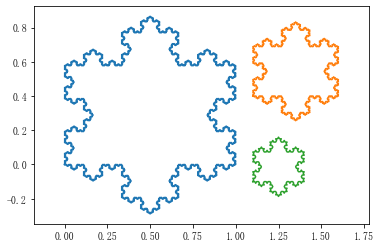

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plot_snow(snow_list):
    """绘制雪花"""
    
    for triangle, k in snow_list:
        data = np.array(snow(triangle, k))
        x, y = np.split(data, 2, axis=1)
        plt.plot(x, y)
    
    plt.axis('equal') 
    plt.show()

snow_list = [
    ([(0,0), (0.5,0.8660254), (1,0)], 5),
    ([(1.1,0.4), (1.35,0.8330127), (1.6,0.4)], 4),
    ([(1.1,-0.1), (1.25,0.15980761), (1.4,-0.1)], 3)
]
plot_snow(snow_list)

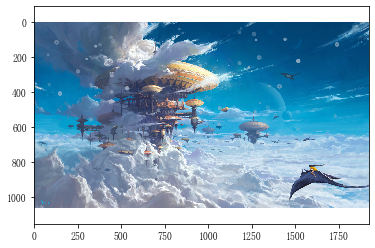

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def draw_scenery():
    """绘制雪景图"""
    
    im = Image.open(r'D:\BaiduNetdiskDownload\壁纸\brage.jpg')
    bg = np.array(im)
    plt.imshow(bg) # 绘制背景图
    
    for i in range(80):
        x = np.random.randint(80, im.size[0]-80)
        y = np.random.randint(30, im.size[1]-30)
        r = np.random.randint(5, 20)
        a = np.random.random()*0.6 + 0.2
        v = np.array((x-r/2, y))
        u = np.array((x+r/2, y))
        w = rotate(v-u, 60) + u
        
        data = np.array(snow([(u[0],u[1]),(w[0],w[1]),(v[0],v[1])], 5))
        x, y = np.split(data, 2, axis=1)
        plt.plot(x, y, c='#AABBCC', lw=1, ls='-', alpha=a)
    
    plt.axis('equal') 
    plt.show()

draw_scenery()